In [398]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [399]:
def read_dr3_spec(spec_name, ang='', star_kw='', loss_corr_kw='',  av_kw=''):


	# If the file exists
    try: 
	
        ###########

        # Print some info
        print(' ')
        print('File to read:', spec_name)


		###########

		# Open the spectrum
        hdu = fits.open(spec_name)
		

		###########

		# Define the columns based on file name
        keyword1 = '_ncl.'
        keyword2 = '_ncge.'
        keyword3 = '_scl.'
       
        if keyword1 in spec_name:
            print('This spectrum is NOT corrected for slit flux losses.') 
            flux = hdu[1].data['FLUX']
            flux_dr = hdu[1].data['FLUX_DR']
            waves = hdu[1].data['WAVE']
            flux_dr_final = np.array(flux_dr)
            
        elif keyword2 in spec_name:
            print('spectrum IS NOT corrected for galactic dust extinction.')
            print('De-reddened spectra unavailable.')
            flux = hdu[1].data['FLUX']
            waves = hdu[1].data['WAVE']
            flux_dr_final = np.empty(len(waves))
            flux_dr_final[:] = np.NAN
        elif keyword3 in spec_name:
            print('spectrum is corrected for galactic dust extinction' )
            print('and flux losses with a spline function')
            flux = hdu[1].data['FLUX']
            flux_dr = hdu[1].data['FLUX_SC']
            waves = hdu[1].data['WAVE']
            flux_dr_final = np.array(flux_dr)
        else:
            flux = hdu[1].data['FLUX']
            flux_dr = hdu[1].data['FLUX_DR']
            waves = hdu[1].data['WAVE']
            flux_dr_final = np.array(flux_dr)	
            
		###########

        # Convert the arrays to numpy arrays 
        waves_final = np.array(waves)
        flux_final = np.array(flux)
        	

		###########

		# Get the units of the waves
        prim_hdr = hdu[0].header
        sec_hdr = hdu[1].header

        unit = ''
        unit = sec_hdr['TUNIT1']
		

		###########

		# Change the units to Angstrom
        if (len(ang) != 0):
            if (unit == 'nm'):
                unit = 'A'
                waves_final = waves_final * 10.



		###########

        # Get the star name
        if (len(star_kw) != 0):
            star = ''
            star = prim_hdr['HNAME']
            
        ###########

        # Get the Av of dust extinction correction
        # and the origin of that value
        if (len(star_kw) != 0):
            av = ''
            av = prim_hdr['AV_VAL']
            av_ori = ''
            av_ori = prim_hdr['AV_ORI'] 
            
		###########

        # Get the flux-loss kw
        if (len(loss_corr_kw) != 0):
            loss_corr = ''
            loss_corr = prim_hdr['LOSS_COR']
            if loss_corr == False:
                loss_corr_spline = prim_hdr['SPL_COR']
                if loss_corr_spline == True:
                    loss_corr = 'spline'
            

	###########

        # File not found 
    except IOError:
        print('=> File not found: ', spec_name)
        flux_final = 999
        waves_final = 999
        unit = '999'


	###########

        # Define the final results
    list_final = [flux_final, flux_dr_final, waves_final, unit]
  
	# Return the flux, waves, unit
    if (len(star_kw) != 0):
        list_final.append(star)

    if (len(loss_corr_kw) != 0):
        list_final.append(loss_corr)
    
    if (len(av_kw) != 0):
        list_final.append(av)
        list_final.append(av_ori)


    # Return the results
    return list_final
	
#example:	
spec_name = "xsl_spectrum_X0595_merged.fits"
[flux_temp, flux_tempdr_temp, waves_temp, unit, star, loss_corr, Av, Av_ori]= read_dr3_spec(spec_name, ang='on', star_kw='on', loss_corr_kw='on', av_kw = 'on')
print([flux_temp, flux_tempdr_temp, waves_temp, unit, star, loss_corr, Av, Av_ori])


 
File to read: xsl_spectrum_X0595_merged.fits
[array([3.3045233e-13, 3.0658402e-13, 2.8841160e-13, ..., 3.8926751e-14,
       3.6463054e-14, 3.4783842e-14], dtype=float32), array([4.4303618e-13, 4.1103384e-13, 3.8666818e-13, ..., 3.9605221e-14,
       3.7098549e-14, 3.5390036e-14], dtype=float32), array([ 3500.    ,  3500.117 ,  3500.2334, ..., 24767.94  , 24768.766 ,
       24769.59  ], dtype=float32), 'A', 'HD 99109', True, 0.2, 'interp.']


In [400]:
spec_name = "xsl_spectrum_X0630_merged.fits"
[flux_temp1, flux_tempdr_temp1, waves_temp1, unit, star, loss_corr, Av, Av_ori]= read_dr3_spec(spec_name, ang='on', star_kw='on', loss_corr_kw='on', av_kw = 'on')
print([flux_temp1, flux_tempdr_temp1, waves_temp1, unit, star, loss_corr, Av, Av_ori])


 
File to read: xsl_spectrum_X0630_merged.fits
[array([3.3168729e-14, 3.2933105e-14, 3.2232321e-14, ..., 1.7903547e-15,
       1.7237469e-15, 1.6324081e-15], dtype=float32), array([4.1326311e-14, 4.1032566e-14, 4.0159275e-14, ..., 1.8137076e-15,
       1.7462298e-15, 1.6536986e-15], dtype=float32), array([ 3500.    ,  3500.117 ,  3500.2334, ..., 24767.94  , 24768.766 ,
       24769.59  ], dtype=float32), 'A', 'HE 1207-3108', True, 0.15, 'interp.']


In [401]:
spec_name = "xsl_spectrum_X0907_merged.fits"
[flux_temp2, flux_tempdr_temp2, waves_temp2, unit, star, loss_corr, Av, Av_ori]= read_dr3_spec(spec_name, ang='on', star_kw='on', loss_corr_kw='on', av_kw = 'on')
print([flux_temp2, flux_tempdr_temp2, waves_temp2, unit, star, loss_corr, Av, Av_ori])


 
File to read: xsl_spectrum_X0907_merged.fits
[array([3.3768249e-13, 1.9042927e-13, 1.3331396e-13, ..., 2.7380997e-13,
       2.6367577e-13, 2.6461895e-13], dtype=float32), array([3.3768249e-13, 1.9042927e-13, 1.3331396e-13, ..., 2.7380997e-13,
       2.6367577e-13, 2.6461895e-13], dtype=float32), array([ 3500.    ,  3500.117 ,  3500.2334, ..., 24767.94  , 24768.766 ,
       24769.59  ], dtype=float32), 'A', 'HD 109871', True, 0.0, 'interp.']


: 5440-5920 Å; 9930-11530 Å; 12980-14840 Å; 17850-19660 Å; 22690-22820 Å; 24700-24870

## b)

In [402]:
regiones = [(5440, 5920), (9930, 11530), (12980, 14840), (17850, 19660), (22690, 22820), (24700, 24870)]

In [403]:
def eliminar_secciones(longitudes_de_onda, flujo, secciones):
    indices_a_borrar = []
    for seccion in secciones:
        lim_inf, lim_sup = seccion
        for i in range(len(longitudes_de_onda)):
            if lim_inf <= longitudes_de_onda[i] <= lim_sup:
                indices_a_borrar.append(i)
    longitudes_de_onda_final = [longitudes_de_onda[i] for i in range(len(longitudes_de_onda)) if i not in indices_a_borrar]
    flujo_final = [flujo[i] for i in range(len(flujo)) if i not in indices_a_borrar]
    return longitudes_de_onda_final, flujo_final


In [404]:
waves_final, flux_final=eliminar_secciones(waves_temp,flux_temp,regiones)
waves_final1, flux_final1=eliminar_secciones(waves_temp1,flux_temp1,regiones)
waves_final2, flux_final2=eliminar_secciones(waves_temp2,flux_temp2,regiones)

calculando T de las estrellas con 4 metodos distintos, los cuales despues tienen que ser comparados con los resultados obtenido por el paper mostrado

In [405]:
from scipy.optimize import curve_fit
import astropy.units as u
from scipy.integrate import simps
import astropy.constants as const
from astropy.convolution import convolve, Gaussian1DKernel

# PARTE D.3

In [406]:
def calcular_temperatura_efectiva(flujos, longitudes_de_onda, radio_estrella):
    # Convertir flujos a unidades SI: W/m^2/m
    flujos_SI = np.array(flujos) * 1e3  # 1 erg/s/cm^2 = 1e3 W/m^2
    sigma = const.sigma_sb.value  # Constante de Stefan-Boltzmann: W/m^2/K^4
    
    # Convertir longitudes de onda a unidades SI:
    longitudes_de_onda_SI = np.array(longitudes_de_onda) * 1e-10  # 1 Å = 1e-10 m
    
    # Calcular el flujo integrado usando simps
    flujo_integrado = simps(flujos_SI, longitudes_de_onda_SI)
    
    # Calcular la luminosidad total (W)
    luminosidad = 4 * np.pi * radio_estrella**2 * flujo_integrado
    
    # Calcular la temperatura efectiva usando la ley de Stefan-Boltzmann (K)
    temperatura_efectiva = (luminosidad / (4 * np.pi * radio_estrella**2 * sigma))**0.25
    
    return temperatura_efectiva

In [407]:
#0595
r=1.688261289571e18
R=6.83018611e8
Flux_su=((r/R)**2)*flux_temp

t1 = calcular_temperatura_efectiva(Flux_su, waves_temp, R)
print(f'Temperatura efectiva: {t1:.2f} K')

Temperatura efectiva: 511.17 K


In [408]:
#x0630
r=3.49911e19
R=3.1371e9
Flux_su1=((r/R)**2)*flux_temp1

t2= calcular_temperatura_efectiva(Flux_su1, waves_temp1, R)
print(f'Temperatura efectiva: {t2:.2f} K')

Temperatura efectiva: 529.81 K


In [409]:
#0907
r=1.98571e19
R=2.9041e10
Flux_su2=((r/R)**2)*flux_temp2

t3 = calcular_temperatura_efectiva(Flux_su2, waves_temp2, R)
print(f'Temperatura efectiva: {t3:.2f} K')

Temperatura efectiva: 392.59 K


# PARTE D.4

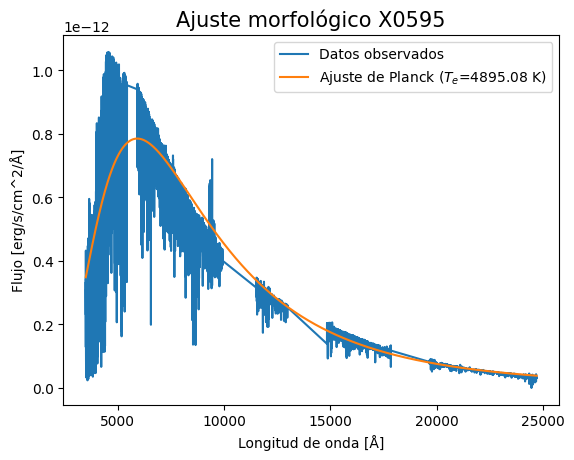

In [410]:
longitud_de_onda = waves_final
flujo = flux_final

# Constantes
h = 6.62607015e-27  # Constante de Planck [erg * s]
c = 2.99792458e18  # Velocidad de la luz [Å/s]
k = 1.380649e-16  # Constante de Boltzmann [erg/K]

def planck(longitud_de_onda, temperatura):
    factor1 = 2 * np.pi * h * c**2 / longitud_de_onda**5
    factor2 = np.exp(h * c / (longitud_de_onda * k * temperatura)) - 1
    return factor1 / factor2

def ajustar_planck(longitud_de_onda, flujo):
    def planck_norm(longitud_de_onda, temperatura, factor_escala):
        return factor_escala * planck(longitud_de_onda, temperatura)

    popt, _ = curve_fit(planck_norm, longitud_de_onda, flujo, p0=[5000, 1e-14])
    temperatura_optima, factor_escala_optimo = popt
    return temperatura_optima, factor_escala_optimo

temperatura_optima, factor_escala_optimo = ajustar_planck(longitud_de_onda, flujo)


longitud_de_onda_plot = np.linspace(min(longitud_de_onda), max(longitud_de_onda), 1000)
flujo_planck_optimo = factor_escala_optimo * planck(longitud_de_onda_plot, temperatura_optima)

plt.plot(longitud_de_onda, flujo, label='Datos observados')
plt.plot(longitud_de_onda_plot, flujo_planck_optimo, label=f"Ajuste de Planck ($T_e$={temperatura_optima:.2f} K)")
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Flujo [erg/s/cm^2/Å]")
plt.title('Ajuste morfológico X0595', fontsize=15)
plt.legend()
plt.show()

Temperatura efectiva: 5798.04 K


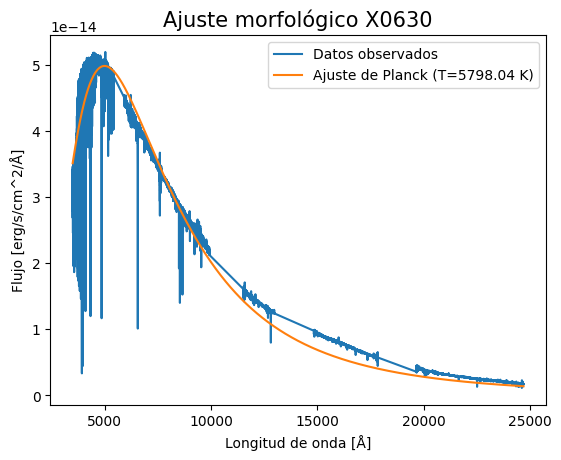

In [411]:
longitud_de_onda = waves_final1
flujo = flux_final1


temperatura_optima, factor_escala_optimo = ajustar_planck(longitud_de_onda, flujo)
print(f"Temperatura efectiva: {temperatura_optima:.2f} K")

longitud_de_onda_plot = np.linspace(min(longitud_de_onda), max(longitud_de_onda), 1000)
flujo_planck_optimo = factor_escala_optimo * planck(longitud_de_onda_plot, temperatura_optima)

plt.plot(longitud_de_onda, flujo, label='Datos observados')
plt.plot(longitud_de_onda_plot, flujo_planck_optimo, label=f"Ajuste de Planck (T={temperatura_optima:.2f} K)")
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Flujo [erg/s/cm^2/Å]")
plt.title('Ajuste morfológico X0630', fontsize=15)
plt.legend()
plt.show()

Temperatura efectiva: 3583.95 K


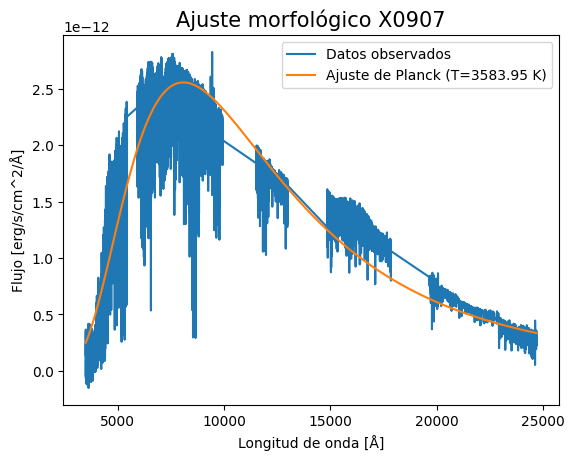

In [412]:
longitud_de_onda = waves_final2
flujo = flux_final2

temperatura_optima, factor_escala_optimo = ajustar_planck(longitud_de_onda, flujo)
print(f"Temperatura efectiva: {temperatura_optima:.2f} K")

longitud_de_onda_plot = np.linspace(min(longitud_de_onda), max(longitud_de_onda), 1000)
flujo_planck_optimo = factor_escala_optimo * planck(longitud_de_onda_plot, temperatura_optima)

plt.plot(longitud_de_onda, flujo, label='Datos observados')
plt.plot(longitud_de_onda_plot, flujo_planck_optimo, label=f"Ajuste de Planck (T={temperatura_optima:.2f} K)")
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Flujo [erg/s/cm^2/Å]")
plt.title('Ajuste morfológico X0907', fontsize=15)
plt.legend()
plt.show()

# PARTE E

## Tabla:


-x0595: 5295 K

-x0630: 5435 K

-x0907: 3940 K

Notamos que en la tabla obtenemos valores para las estrellas tabulados como:

## Wien en Longitudes de onda

-x0595: 6344 K

-x0630 5754 K

-x0907: 3812 K

## Wien en Frecuencias

-x0595: 6340 K

-x0630: 5750 K

-x0907: 3067 K


Para el ajuste mediante la ley de wien con las longitudes de onda y frecuencias se tienen valores bastante cercanos entre sí, esto se debe a que en cierta forma se deducen de la misma forma, solo que aplicando una transformación en la distribución del espectro. Comparando con los valores tabulados, se encuentra una diferencia máxima de 1000 K aproximado, lo que es bastante alejado al valor real, por otro lado, se puede ver que para una de las estrellas en la ley de wien para longitudes la temperatura es muy cercana a la tabulada, mientras que su respectiva frecuencia no lo es, esto lo podemos atribuir a que el espectro de las estrellas es bastante caotico, y su longitud de onda - frecuencia máxima llega a ser complicada de localizar de forma precisa.

## Integración del espectro:

-x0595: 511 K

-x0630: 529 K

-x0907: 392 K

Para la integración del espectro se puede ver que las temperaturas difieren en un orden de magnitud a lo obtenido anteriormente y mediante las tabulaciones, se cree que esto se debe a un problema en trabajar con las unidades al suavizar el espectro, y por lo tanto error en el cálculo de la temperatura, por otro lado, si bien los ordenes de magnitud hacen que difiera mucho los valores obtenidos con los tabulados, si se ignora este orden de magnitud los valores darán muy cercanos


## Ajuste morfológico:
-x0595: 5295 K

-x0630: 5435 K

-x0907: 3940 K

En el ajuste morfológico se obtienen valores cercanos a los tabulados, con una diferencia máxima de 400 K, diferencia que se puede dar debido a que el ajuste de la curva de Planck es bastante suave comparado al espectro detectado de la estrella, por lo que se puede perder o añadir información sobre el flujo, siendo este el más cercano si no fuera por el error en la integración directa del espectro